### 실습 목차

* 1. NLTK기반 자연언어처리
  * 1-1. 어휘 분석
  * 1-2. 구문 분석
  * 1-3. 개체명 인식

* 2. NLTK를 활용한 키워드 분석

## 1. NLTK기반 자연언어 처리

```
💡 목차 개요 : NLTK 라이브러리를 이용해 자연언어 처리의 여러 분석들을 손쉽게 적용해봅니다
```

- 1-1 문장의 단어들을 대상으로 형태소를 분석해 분리하고, 각 단어들의 품사를 태깅해 원하는 속성의 단어들만 추출합니다
- 1-2 단어간의 의존관계나 문장의 구조를 구구조분석을 통해 파악합니다
- 1-3 텍스트내에서 개체명을 인식하고 어떤 단어가 어떤 유형에 속하는지 반환합니다


In [1]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/pervinco/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pervinco/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### 1-1. 어휘분석

> 문장내에 있는 여러 단어들을 형태소 기준으로 분리하거나 언어학적으로 어떤 품사에 해당하는지를 분석합니다. 또한 konlpy를 이용해 한국어에서 사용되는 여러 형태소 분석기를 알아보고 차이점을 확인합니다



**pos_tag**
+ nltk의 pos_tag는 분리된 단어들에 대해서 형태소 분석 후 알맞는 품사를 태깅해서 보여줍니다
+ 따라서 input으로는 분리된 단어 리스트가 입력되어야하며 output으로는 tuple형태의 `(형태소, 품사)` 형태로 반환됩니다

In [2]:
sentence="My name is jack and i am 22 years old and my major is natural language processing"

tokens = nltk.word_tokenize(sentence) # 토크나이저로 분리
tagged = nltk.pos_tag(tokens) # pos tagging 실행

for i,j in tagged:
  print(f'{i} - {j}')

My - PRP$
name - NN
is - VBZ
jack - NN
and - CC
i - NN
am - VBP
22 - CD
years - NNS
old - JJ
and - CC
my - PRP$
major - JJ
is - VBZ
natural - JJ
language - NN
processing - NN


여기서는 pos_tag 함수를 이용해 원하는 품사의 형태소만 추출합니다

In [3]:
allnoun = []
for word, pos in tagged:
  if pos in ['NN', 'NNP']: # 품사태그 중 NN, NNP만 추출
    allnoun.append(word)

print("형태소 분석 결과: ",tagged)
print("명사만 추출: ", allnoun)

allverb = []
for word, pos in tagged:
  if pos in ['VBZ','VBD']: # 품사태그 중 VBZ, VBD만 추출
    allverb.append(word)

print("동사만 추출",allverb)

형태소 분석 결과:  [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('jack', 'NN'), ('and', 'CC'), ('i', 'NN'), ('am', 'VBP'), ('22', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('my', 'PRP$'), ('major', 'JJ'), ('is', 'VBZ'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN')]
명사만 추출:  ['name', 'jack', 'i', 'language', 'processing']
동사만 추출 ['is', 'is']


이번에는 한국어에서의 형태소 분석 및 품사 태깅을 해봅니다. 영어는 일반적으로 형태소의 기준이 space를 기준으로 하다보니 별도의 형태소 분석기가 없어도 어느정도 수행이 가능하지만, 한국어는 교착어로써 형태소 분석기가 꼭 필요합니다. 이를 위해 Konlpy를 설치합니다

konlpy에서는 여러 종류의 형태소 분석기들을 제공합니다. 각 형태소 분석기 별로 정하고있는 분석 규칙이 다르기 때문에 같은 문장이라도 다르게 형태소를 분석합니다

In [4]:
# konlpy 관련 패키지 import
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from konlpy.tag import Komoran
from konlpy.tag import Twitter

In [5]:
kkma = Kkma()
okt = Okt()
komoran = Komoran()
hannanum = Hannanum()
twitter = Twitter()

/home/pervinco/miniconda3/envs/nlp-project/lib/python3.9/site-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


**morphs** 함수를 이용하면 형태소 분석을 수행할 수 있습니다

In [6]:
# konlpy 의 라이브러리 형태소 분석 비교
print("okt 형태소 분석 :", okt.morphs(u"집에 가면 감자 좀 쪄줄래?"))
print("kkma 형태소 분석 : ", kkma.morphs(u"집에 가면 감자 좀 쪄줄래?"))
print("hannanum 형태소 분석 : ", hannanum.morphs(u"집에 가면 감자 좀 쪄줄래?"))
print("komoran 형태소 분석 : ", komoran.morphs(u"집에 가면 감자 좀 쪄줄래?"))
print("twitter 형태소 분석 : ", twitter.morphs(u"집에 가면 감자 좀 쪄줄래?"))

okt 형태소 분석 : ['집', '에', '가면', '감자', '좀', '쪄줄래', '?']
kkma 형태소 분석 :  ['집', '에', '가', '면', '감자', '좀', '찌', '어', '주', 'ㄹ래', '?']
hannanum 형태소 분석 :  ['집', '에', '가', '면', '감', '자', '좀', '찌', '어', '줄', '래', '?']
komoran 형태소 분석 :  ['집', '에', '가', '면', '감자', '좀', '찌', '어', '주', 'ㄹ래', '?']
twitter 형태소 분석 :  ['집', '에', '가면', '감자', '좀', '쪄줄래', '?']


마찬가지로 한국어 형태소 분석기도 **pos** 함수를 통해 품사 태깅을 할 수 있습니다

In [7]:
# konlpy 의 라이브러리 품사태깅 비교
print("okt 품사태깅 :", okt.pos(u"집에 가면 감자 좀 쪄줄래?"))
print("kkma 품사태깅 : ", kkma.pos(u"집에 가면 감자 좀 쪄줄래?"))
print("hannanum 품사태깅 : ", hannanum.pos(u"집에 가면 감자 좀 쪄줄래?"))
print("komoran 품사태깅 : ", komoran.pos(u"집에 가면 감자 좀 쪄줄래?"))
print("twitter 품사태깅 : ", twitter.pos(u"집에 가면 감자 좀 쪄줄래?"))

okt 품사태깅 : [('집', 'Noun'), ('에', 'Josa'), ('가면', 'Noun'), ('감자', 'Noun'), ('좀', 'Noun'), ('쪄줄래', 'Verb'), ('?', 'Punctuation')]
kkma 품사태깅 :  [('집', 'NNG'), ('에', 'JKM'), ('가', 'VV'), ('면', 'ECE'), ('감자', 'NNG'), ('좀', 'MAG'), ('찌', 'VV'), ('어', 'ECS'), ('주', 'VXV'), ('ㄹ래', 'EFQ'), ('?', 'SF')]
hannanum 품사태깅 :  [('집', 'N'), ('에', 'J'), ('가', 'P'), ('면', 'E'), ('감', 'P'), ('자', 'E'), ('좀', 'M'), ('찌', 'P'), ('어', 'E'), ('줄', 'P'), ('래', 'E'), ('?', 'S')]
komoran 품사태깅 :  [('집', 'NNG'), ('에', 'JKB'), ('가', 'VV'), ('면', 'EC'), ('감자', 'NNP'), ('좀', 'MAG'), ('찌', 'VV'), ('어', 'EC'), ('주', 'VX'), ('ㄹ래', 'EF'), ('?', 'SF')]
twitter 품사태깅 :  [('집', 'Noun'), ('에', 'Josa'), ('가면', 'Noun'), ('감자', 'Noun'), ('좀', 'Noun'), ('쪄줄래', 'Verb'), ('?', 'Punctuation')]


**nouns** 함수를 이용하면 konlpy에서는 별도의 지정없이 사용하는 형태소 분석기에서 명사를 추출할 수 있습니다

In [8]:
komoran.nouns('집에 가면 감자 좀 쪄줄래?')

['집', '감자']

### 1-2. 구문 분석

> 구문 분석은 명사구, 동사구 처럼 구문구조를 분석하는 것을 의미합니다. 문장을 이루고 있는 구, 단어들이 문장 내에서 어떤 수식, 의존 관계를 갖는지 나타내는 일종의 Tree를 만들어주는 거라고 생각하면 이해하기 쉽습니다


In [9]:
import konlpy
import nltk

구문 분석을 위해 우선 형태소 분석을 먼저 수행합니다. 형태소 분석해 단어들의 품사를 모두 태깅합니다

In [10]:
sentence = '만 6세 이하의 초등학교 취학 전 자녀를 양육하기 위해서는'
words = konlpy.tag.Twitter().pos(sentence) # 품사태깅
words

[('만', 'Noun'),
 ('6', 'Number'),
 ('세', 'Noun'),
 ('이하', 'Noun'),
 ('의', 'Josa'),
 ('초등학교', 'Noun'),
 ('취학', 'Noun'),
 ('전', 'Noun'),
 ('자녀', 'Noun'),
 ('를', 'Josa'),
 ('양육', 'Noun'),
 ('하기', 'Verb'),
 ('위', 'Noun'),
 ('해서는', 'Verb')]

In [11]:
# 명사, 동사, 형용사 구의 규칙을 정의합니다
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
parser = nltk.RegexpParser(grammar) # 선언된 grammer rule을 parser에게 입력
chunks = parser.parse(words) # grammer rule에 따라 단어를 파싱
print("# Print whole tree")
print(chunks.pprint())

# 명사구에 해당하는 subtree만 출력합니다
print("\n# Print noun phrases only")
for subtree in chunks.subtrees():
    if subtree.label()=='NP': # 서브트리의 품사가 NP인 경우
        print(' '.join((e[0] for e in list(subtree))))
        print(subtree.pprint())


# Print whole tree
(S
  (NP 만/Noun 6/Number 세/Noun 이하/Noun)
  의/Josa
  (NP 초등학교/Noun 취학/Noun 전/Noun 자녀/Noun)
  를/Josa
  (NP 양육/Noun)
  (VP 하기/Verb)
  (NP 위/Noun)
  (VP 해서는/Verb))
None

# Print noun phrases only
만 6 세 이하
(NP 만/Noun 6/Number 세/Noun 이하/Noun)
None
초등학교 취학 전 자녀
(NP 초등학교/Noun 취학/Noun 전/Noun 자녀/Noun)
None
양육
(NP 양육/Noun)
None
위
(NP 위/Noun)
None


구문 분석은 NLTK 뿐만아니라 Spacy라는 라이브러리에서도 손쉽게 수행이 가능합니다. 부가적으로 Spacy는 영어 형태소 분석기로써 NLTK만큼 자주 사용되는 라이브러리로 구문분석에 있어서 NLTK보다 직관적인 장점이있기 때문에, 이번 실습 여기 부분에서만 잠깐 다루어 보겠습니다

In [12]:
import spacy
nlp = spacy.load('en_core_web_sm')

Spacy는 문장을 token들로 구성된 document로 처리합니다. 각 token에는 품사, 의존 관계, 개체명 정보 등이 태깅되어 어떤 토큰이 어떤것을 수식하고 있는지 등의 관계를 알 수 있습니다

In [13]:
doc = nlp('The fat cat sat on the mat')
for token in doc:
  print(token.text, token.dep_, token.head.text) # 토큰, 의존관계, 토큰 / 두 토큰 사이의 의존관계를 표시

The det cat
fat amod cat
cat nsubj sat
sat ROOT sat
on prep sat
the det mat
mat pobj on


In [14]:
spacy.displacy.render(doc, style='dep', jupyter=True)

### 1-3. 개체명 인식

> 개체명 인식(Named Entity Recognition)이란 말 그대로 이름을 가진 개체를 인식하겠다는 것을 의미합니다. 어떤 이름을 의미하는 단어를 보고는 그 단어가 어떤 유형에 속하는 단어인지를 인식하는 것을 말합니다


In [15]:
from nltk import word_tokenize, pos_tag, ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/pervinco/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/pervinco/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

ne_chunk를 통해 단어들의 개체명을 추출할 수 있습니다. ne_chunk는 개체명을 태깅하기 위해서 앞서 품사 태깅(pos_tag)이 수행되어야 합니다. 결과에서 Mark는 PERSON(사람), Stanford University는 조직(ORGANIZATION), California은 위치(GPE)라고  개체명 인식이 수행된 것을 볼 수 있습니다

In [16]:
sent = "Mark is studying at Stanford University in California"

tokens = word_tokenize(sent) # 토크나이징
tagged = pos_tag(tokens) # 품사태깅
entities = ne_chunk(tagged) # 개체명인식

print(entities)

(S
  (PERSON Mark/NNP)
  is/VBZ
  studying/VBG
  at/IN
  (ORGANIZATION Stanford/NNP University/NNP)
  in/IN
  (GPE California/NNP))


## 2. NLTK를 활용한 키워드 분석

```
💡 목차 개요 : NLTK 라이브러리를 이용해 corpus에서 빈도기반 키워드 분석을 실행해 봅니다
```

- 문자열 corpus내에서 형태소 분석을 통해 명사, 형용사만을 추출해 빈도수 그래프와 워드 클라우드를 생성합니다

In [17]:
import pandas as pd
from tqdm import tqdm
from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk import word_tokenize
nltk.download('book', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords')

nltk.corpus.gutenberg.fileids() # nltk.corpus.gutenberg 는 여러 텍스트 코퍼스들을 제공

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pervinco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

nltk에서 제공하는 book corpus 중 여기서는 austen-emma라는 corpus를 사용하겠습니다. lower() 함수로 모두 소문자로 만들어줍니다

In [18]:
data = nltk.corpus.gutenberg.raw('austen-emma.txt').lower()

corpus를 word_tokenize 함수를 통해 형태소 분석을 수행합니다

In [19]:
word_list = word_tokenize(data)

extract_by_tag는 word_list와 tag_name을 입력받아 word_list에 대해 원하는 품사 태그를 tag_name에 입력하면 해당 품사에 해당하는 단어들만 추출이 가능한 함수입니다. sorting은 Counter 모듈을 이용해 단어를 빈도수기반으로 정렬해줍니다

In [20]:
# 위에서 추출된 morphs를 통해 원하는 품사에 해당하는 단어들만 추출해 리스트로 반환하는 함수
def extract_by_tag(word_list, tag_name):
  pos_list = pos_tag(word_list, tagset='universal') # 여기서는 universal tag를 이용
  extracted_list = []
  for word_tag in tqdm(pos_list):
    if tag_name in word_tag[1]: # 0번은 품사 태그. 1번은 텍스트로 여기서는 텍스트만 추출
      extracted_list.append(word_tag[0])
  return extracted_list

# 추출된 리스트를 출현단어 빈도수를 매핑하여 정렬
def sorting(sentence_list):
  count = Counter(sentence_list)
  words = (dict(count.most_common()))
  return words

In [21]:
nouns = extract_by_tag(word_list,'NOUN') # 명사만 추출
print(f'명사 예시:{nouns[5:10]}')

adjs = extract_by_tag(word_list,'ADJ') # 형용사만 추출
print(f'\n형용사 예시:{adjs[:5]}')

100%|██████████| 191781/191781 [00:00<00:00, 8670027.54it/s]


명사 예시:['chapter', 'i', 'woodhouse', 'handsome', 'clever']


100%|██████████| 191781/191781 [00:00<00:00, 9355740.02it/s]


형용사 예시:['rich', 'comfortable', 'happy', 'best', 'little']


nltk에서 정의된 불용어들을 명사, 형용사 리스트에서 제외하는 정제작업을 거칩니다.

그 후 sorting을 통해 높은 빈도수를 갖는 단어 순으로 정렬해줍니다

In [22]:
# 제거할 불용어를 정의
stop = stopwords.words('english')
stop.extend(['mr.','mrs.']) # 원하는 불용어 추가

# 지정한 불용어를 각각 리스트에서 제거함
nouns = [token for token in nouns if not token in stop]
adjs = [token for token in adjs if not token in stop]

# 추출된 리스트를 출현단어 빈도수를 매핑하여 정렬
nouns_count = sorting(nouns)
adj_count = sorting(adjs)

마지막으로 Wordcloud와 빈도기반 키워드 그래프를 생성합니다. WordCloud 함수에 generate_from_frequencies를 사용해 Counter 클래스로 묶인 인자를 넣으면 자동으로 워드클라우드를 쉽게 만들 수 있습니다

In [23]:
def view_wordcloud(counter_class):
  # 단어 빈도수를 기준으로 WordCloud를 생성함
  wordcloud = WordCloud(background_color='white',
                      colormap = "Accent_r",width=2500, height=1500,
                      stopwords=stopwords
                      ).generate_from_frequencies(counter_class)
  plt.figure(figsize=(10,8)) # 이미지 출력사이즈 지정
  plt.imshow(wordcloud)
  plt.tight_layout(pad=0)
  plt.axis('off')
  plt.show()

  # 상위 20개 키워드의 출현 빈도수를 그래프로 표현
  plt.figure(figsize=(10, 5)) # 이미지 출력사이즈 지정
  plt.xlabel('keywords') # x축 이름지정
  plt.ylabel('counts') # y축 이름지정
  plt.xticks(rotation=70) # x축 틱 각도 회전
  for key, value in zip(list(counter_class.keys())[:20],list(counter_class.values())[:20]): # 상위 20개만 추출
      plt.bar(key, value, color='lightgrey') # barchart 생성
  plt.show()

  # 단어별 빈도수 데이터 프레임 생성
  counter_df = pd.DataFrame({'word':counter_class.keys(),'counts':counter_class.values()})

  display(counter_df)
  return counter_df # return 값으로 단어별 빈도수 데이터프레임을 반환

빈도기반 키워드 그래프의 경우 현재 함수에서는 상위 20개에 대해서만 생성하고있습니다. 워드클라우드와 그래프가 키워드 분석 결과를 시각적으로 표현하고 있는 것을 확인할 수 있습니다. 또한 return 값으로 데이터 프레임 형태도 반환하고 있어, 추후 자유롭게 사용할 수 있습니다

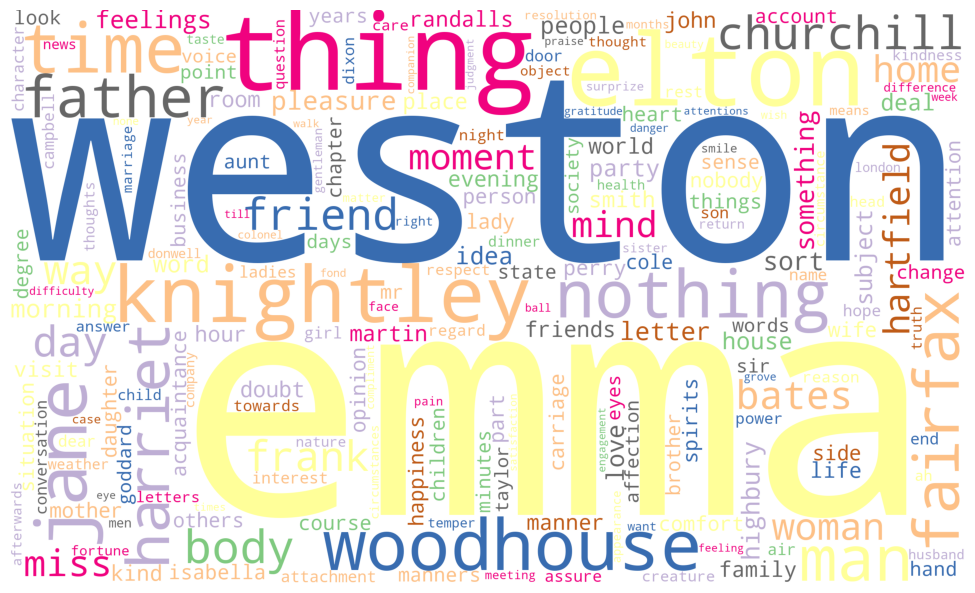

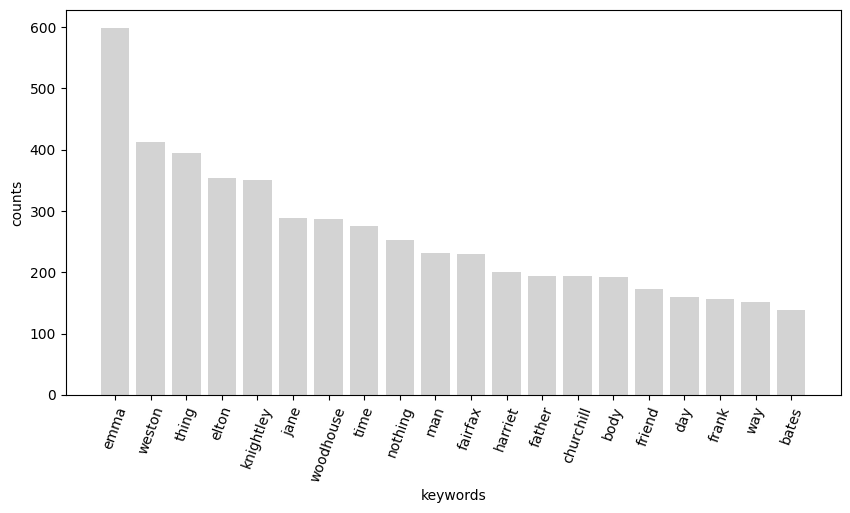

,word,counts
0,emma,598
1,weston,413
2,thing,394
3,elton,354
4,knightley,351
...,...,...
4206,veils,1
4207,deficiencies,1
4208,predictions,1
4209,band,1


In [24]:
nouns_df = view_wordcloud(nouns_count)

다음은 형용사 단어들에 대한 결과입니다

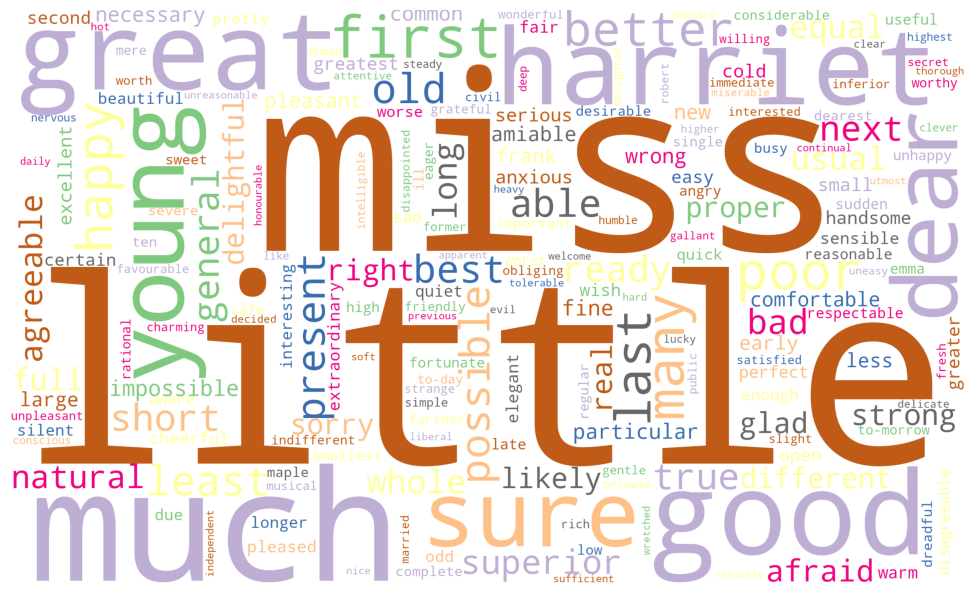

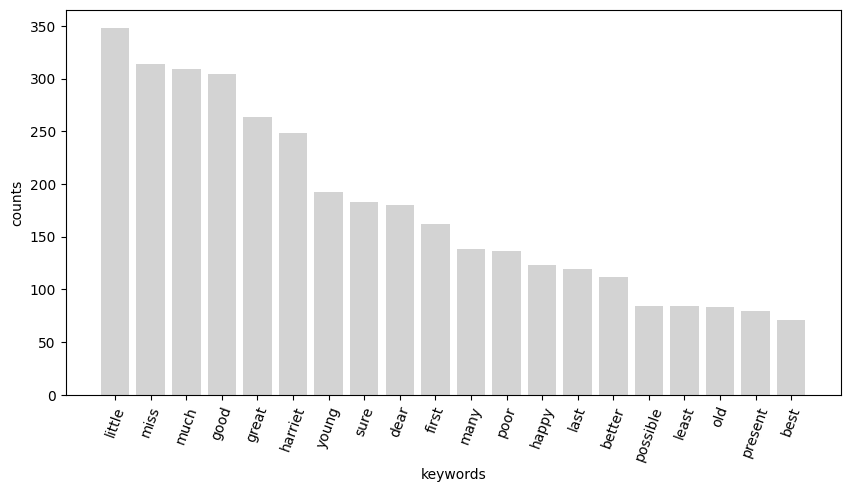

,word,counts
0,little,348
1,miss,314
2,much,309
3,good,304
4,great,263
...,...,...
1750,gradual,1
1751,intermediate,1
1752,pain.,1
1753,safe.,1


In [25]:
adj_df = view_wordcloud(adj_count)